In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_csv("metrics.csv") 


print(df.shape)
print(df.columns)
df.sample(2)

(84, 19)
Index(['run_name', 'arc_features', 'arc_encoder_blocks', 'arc_num_params',
       'arc_latent_volume', 'arc_num_conv', 'arc_skip', 'train_loss',
       'valid_loss', 'test_loss', 'valid_F1', 'train_F1', 'test_F1',
       'train_Accuracy', 'valid_Accuracy', 'test_Accuracy',
       'train_Accuracy_seq', 'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')


,run_name,arc_features,arc_encoder_blocks,arc_num_params,arc_latent_volume,arc_num_conv,arc_skip,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
43,pseudop_nc_1_n4_2_n8_2_skip0,"[4, 4, 4, 8, 8]",4,965,64.0,1,0,0.124122,0.152851,0.135238,0.706426,0.812121,0.779707,0.777691,0.691523,0.743828,0.0,0.0,0.0
44,pseudop_nc_1_n4_1_n8_2_skip1,"[4, 4, 8, 8]",3,1133,128.0,1,1,0.091885,0.155121,0.136982,0.734305,0.869236,0.779428,0.849714,0.725626,0.754333,0.0,0.0,0.0


In [3]:
sns.set_theme(style="whitegrid", palette="pastel")

In [4]:
df.sort_values(
    ["test_Accuracy","valid_Accuracy", "arc_features", "arc_num_params", "arc_latent_volume", "arc_skip"]
)
data_c_skips = df[df["arc_skip"] == 1]
data_c_no_skips = df[df["arc_skip"] == 0]

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Filtrar modelos según skip connection
data_skip0 = df[df["arc_skip"] == 0]
data_skip1 = df[df["arc_skip"] == 1]

print("Modelos sin Skip Connections:", data_skip0.shape[0])
print("Modelos con Skip Connections:", data_skip1.shape[0])


cols_arq = [
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
    "arc_num_params"
]
# Métricas de rendimiento
cols_perf = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]

Modelos sin Skip Connections: 42
Modelos con Skip Connections: 42


In [6]:
# Estadísticas para cada grupo
print("Estadísticas (sin skip connections):")
print(data_skip0[["train_Accuracy", "valid_Accuracy", "test_Accuracy"]].describe())

print("\nEstadísticas (con skip connections):")
print(data_skip1[["train_Accuracy", "valid_Accuracy", "test_Accuracy"]].describe())

Estadísticas (sin skip connections):
       train_Accuracy  valid_Accuracy  test_Accuracy
count       42.000000       42.000000      42.000000
mean         0.786836        0.678871       0.724646
std          0.049639        0.033433       0.049902
min          0.682347        0.610554       0.620077
25%          0.752836        0.659282       0.696055
50%          0.791954        0.676052       0.718504
75%          0.809464        0.698998       0.750557
max          0.943391        0.750553       0.847667

Estadísticas (con skip connections):
       train_Accuracy  valid_Accuracy  test_Accuracy
count       42.000000       42.000000      42.000000
mean         0.846234        0.732565       0.767036
std          0.059926        0.043512       0.054855
min          0.682347        0.630577       0.652342
25%          0.808536        0.701328       0.739077
50%          0.849680        0.730808       0.772355
75%          0.882565        0.759641       0.802925
max          0.957515   

In [7]:
data_skip0

,run_name,arc_features,arc_encoder_blocks,arc_num_params,arc_latent_volume,arc_num_conv,arc_skip,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
1,pseudop_nc_2_n8_1_n16_2_skip0,"[4, 8, 8, 8, 16, 16]",5,7493,64.0,2,0,0.104936,0.161171,0.123007,0.721928,0.865221,0.830598,0.847807,0.731629,0.809781,0.0,0.0,0.0
3,pseudop_nc_2_n8_0_n16_2_skip0,"[4, 8, 8, 8, 16, 16]",5,7493,64.0,2,0,0.108347,0.160221,0.133142,0.721123,0.859733,0.810831,0.843001,0.726699,0.792186,0.0,0.0,0.0
5,pseudop_nc_2_n8_1_n16_1_skip0,"[4, 8, 8, 16]",3,3365,256.0,2,0,0.093960,0.163603,0.130468,0.698025,0.859973,0.782469,0.837524,0.680856,0.756402,0.0,0.0,0.0
7,pseudop_nc_2_n8_0_n16_1_skip0,"[4, 8, 8, 16]",3,3365,256.0,2,0,0.094604,0.158534,0.141486,0.702269,0.858983,0.765347,0.837221,0.698389,0.735943,0.0,0.0,0.0
9,pseudop_nc_2_n8_1_n16_0_skip0,"[4, 8]",1,629,512.0,2,0,0.119116,0.160884,0.149666,0.723039,0.830298,0.767164,0.797800,0.698127,0.718101,0.0,0.0,0.0
11,pseudop_nc_2_n8_0_n16_0_skip0,"[4, 8]",1,629,512.0,2,0,0.119855,0.167630,0.150915,0.708512,0.827191,0.768462,0.795393,0.688554,0.715682,0.0,0.0,0.0
13,pseudop_nc_1_n8_1_n16_2_skip0,"[4, 8, 8, 8, 16, 16]",5,3629,64.0,1,0,0.103802,0.139857,0.107320,0.730938,0.842540,0.828400,0.809121,0.700529,0.794117,0.0,0.0,0.0
15,pseudop_nc_1_n8_0_n16_2_skip0,"[4, 8, 8, 8, 16, 16]",5,3629,64.0,1,0,0.097401,0.127670,0.102359,0.759018,0.846400,0.839631,0.809516,0.732631,0.801593,0.0,0.0,0.0
17,pseudop_nc_1_n8_1_n16_1_skip0,"[4, 8, 8, 16]",3,1565,256.0,1,0,0.112065,0.176684,0.157566,0.684619,0.829507,0.723351,0.802794,0.655751,0.683501,0.0,0.0,0.0
19,pseudop_nc_1_n8_0_n16_1_skip0,"[4, 8, 8, 16]",3,1565,256.0,1,0,0.111335,0.166889,0.149625,0.686182,0.831124,0.740067,0.803941,0.662258,0.707816,0.0,0.0,0.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
# Listas de campos
cols_arq = [
    "arc_num_params",
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
] 
accuracy_field = "test_Accuracy"
fields = cols_arq  

def plot_accuracy_by_fields(df, fields, accuracy_field, ncols=3, title_suffix=""):
    """
    Genera boxplots de la accuracy en función de cada campo.

    Parámetros:
      - df: DataFrame sobre el que graficar.
      - fields: Lista de campos a analizar.
      - accuracy_field: Campo de rendimiento (ej. test_Accuracy).
      - ncols: Número de columnas en la grilla de subplots.
      - title_suffix: Sufijo para incluir en cada título (ej. "(Con Skip)").
    """
    nfields = len(fields)
    nrows = (nfields + ncols - 1) // ncols  # redondeo hacia arriba
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5), sharey=True)
    axs = axs.flatten()
    axs[0].set_ylim(0.6,1)
    for i, field in enumerate(fields):
        # Trabajamos sobre una copia para evitar modificar el DataFrame original
        df_tmp = df.copy()

        # Si la variable es numérica y tiene muchos valores únicos, se crean 4 bins
        if (
            pd.api.types.is_numeric_dtype(df_tmp[field])
            and df_tmp[field].nunique() > 10
        ):
            try:
                df_tmp["bin"] = pd.qcut(df_tmp[field], q=4, duplicates="drop")
            except Exception:
                df_tmp["bin"] = df_tmp[field]
        else:
            df_tmp["bin"] = df_tmp[field]

        sns.boxplot(
            x="bin",
            y=accuracy_field,
            data=df_tmp,
            ax=axs[i],
            hue="bin",
            palette="flare",
            legend=False
        )
        sns.stripplot(
            x="bin",
            y=accuracy_field,
            data=df_tmp,
            ax=axs[i],
            hue="bin",
            legend=False
        )
        axs[i].set_title(f"{accuracy_field} vs {field} {title_suffix}")
        axs[i].set_xlabel(field)
        axs[i].set_ylabel(accuracy_field)
        axs[i].tick_params(axis="x", rotation=90)

    # Eliminar subplots vacíos
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


# Filtrar el DataFrame según la presencia de skip connections
data_skip = df[df["arc_skip"] == 1]
data_no_skip = df[df["arc_skip"] == 0]

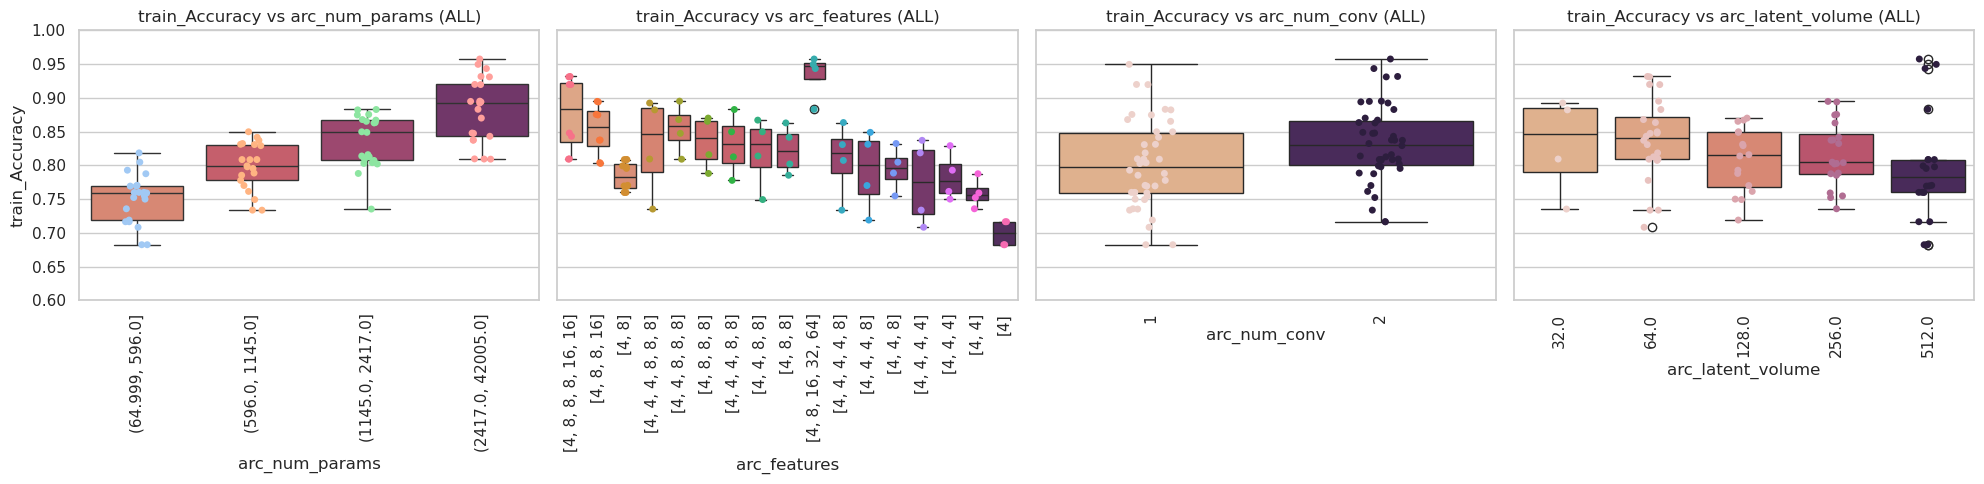

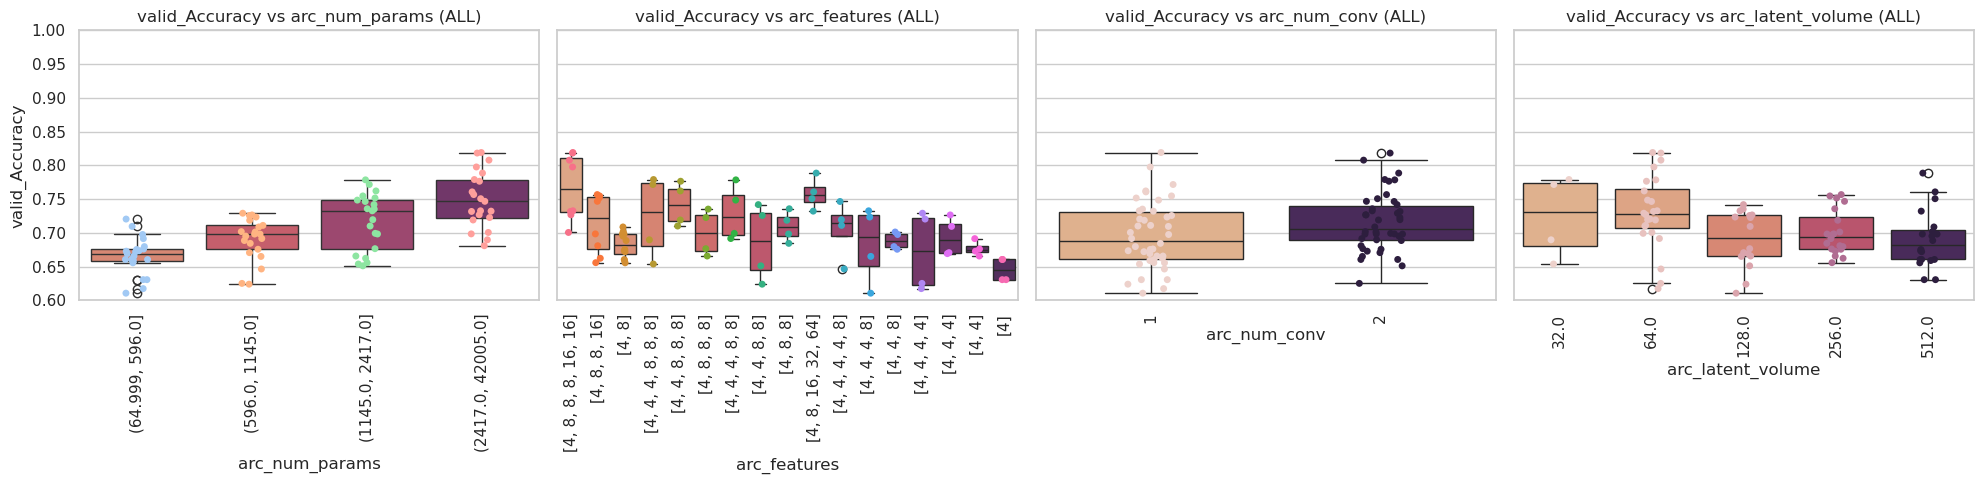

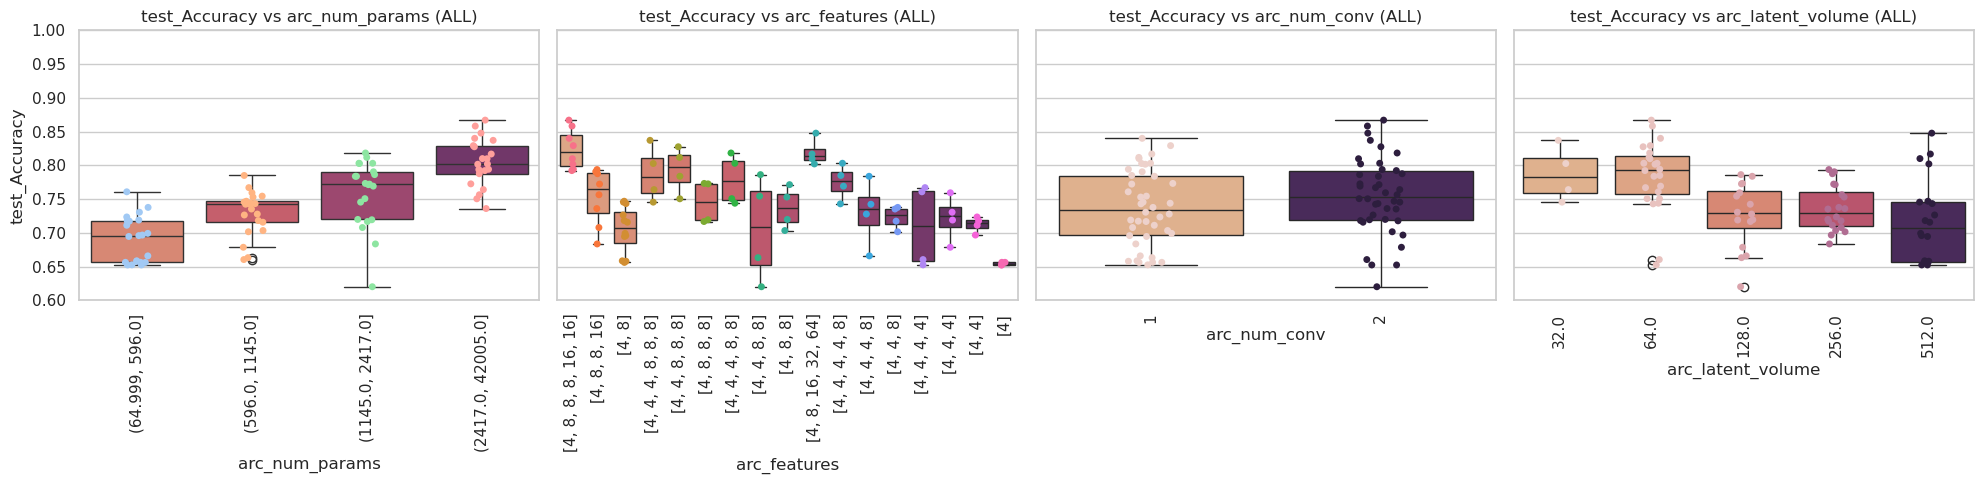

In [9]:
# Versión para modelos CON skip connections
metrics = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]
for ac in metrics:
    plot_accuracy_by_fields(
        df, fields, ac, ncols=4, title_suffix="(ALL)"
)

################    train_Accuracy    ################
################    train_Accuracy    ################


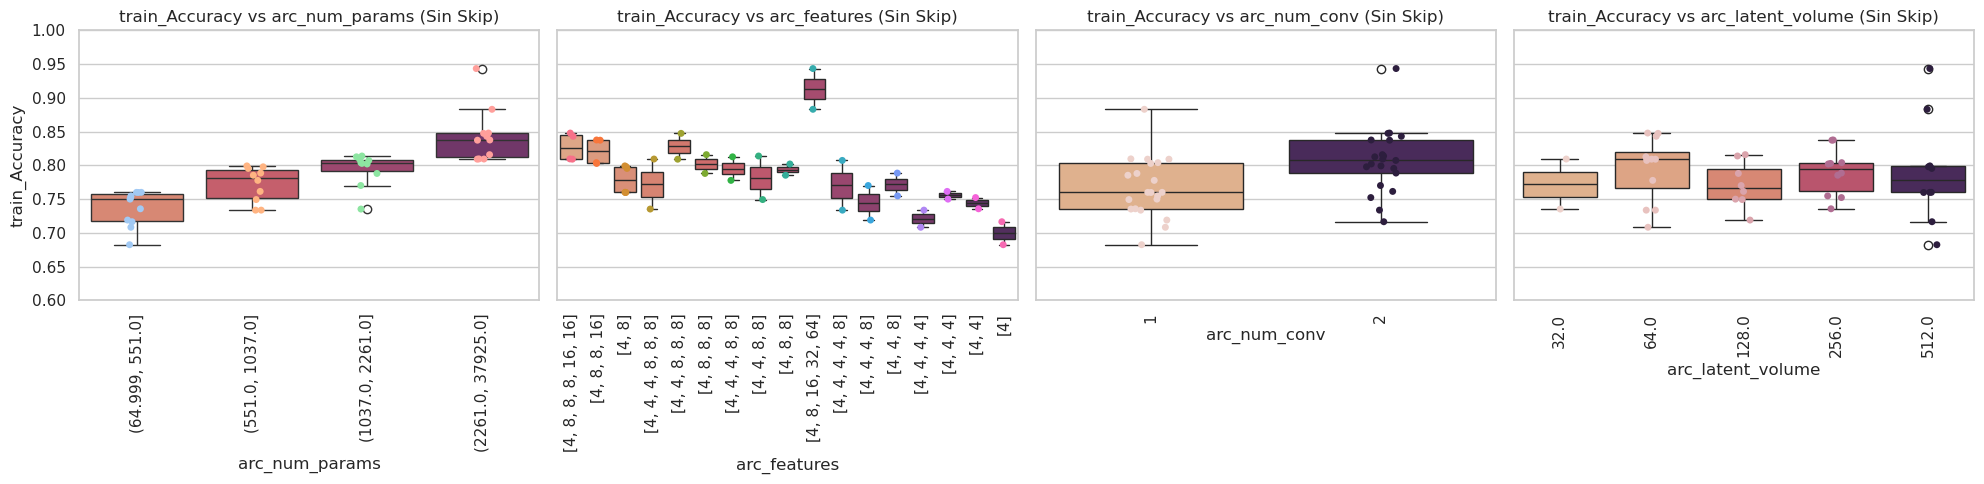

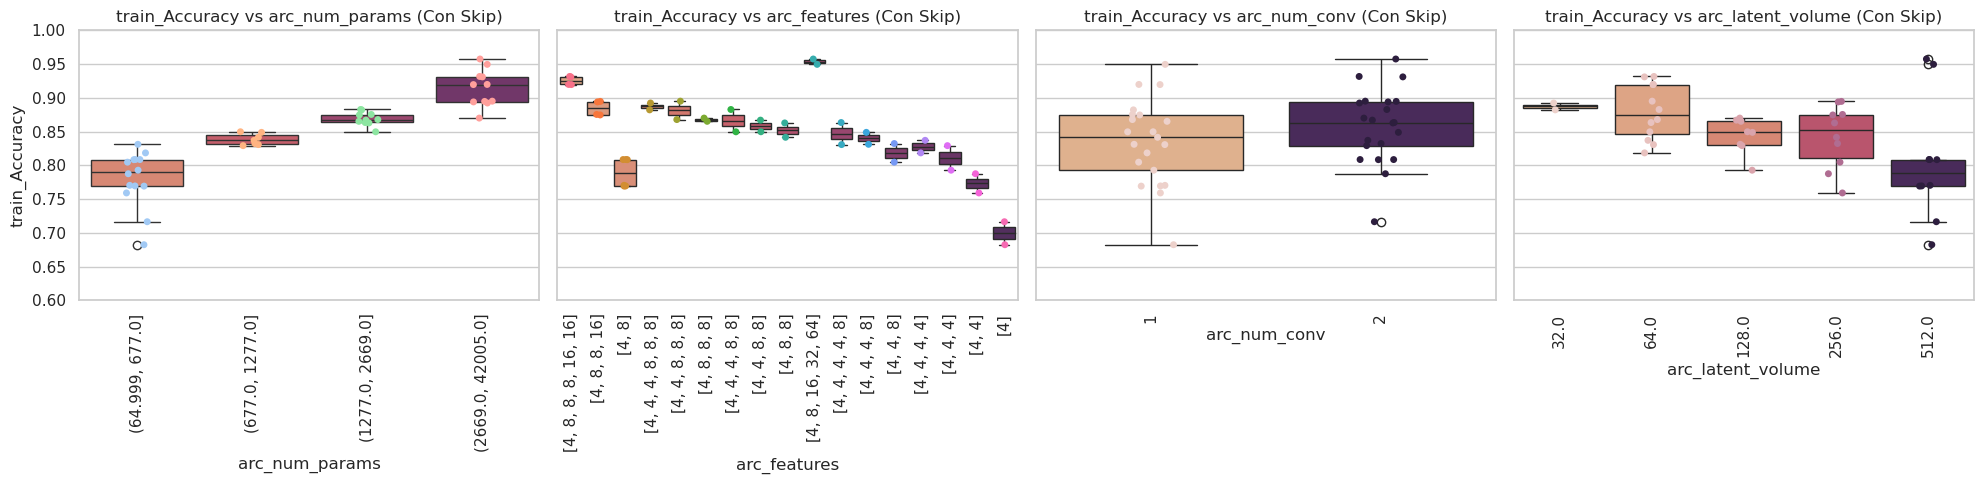

################    valid_Accuracy    ################
################    valid_Accuracy    ################


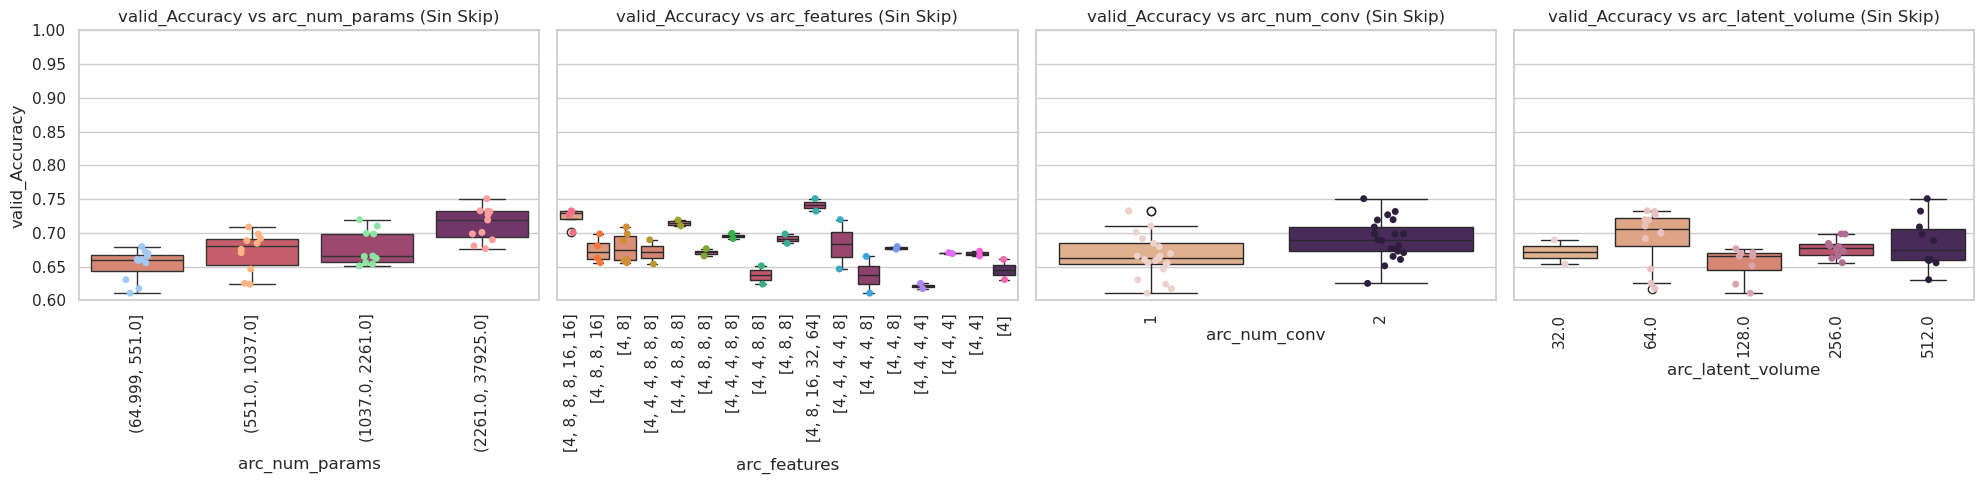

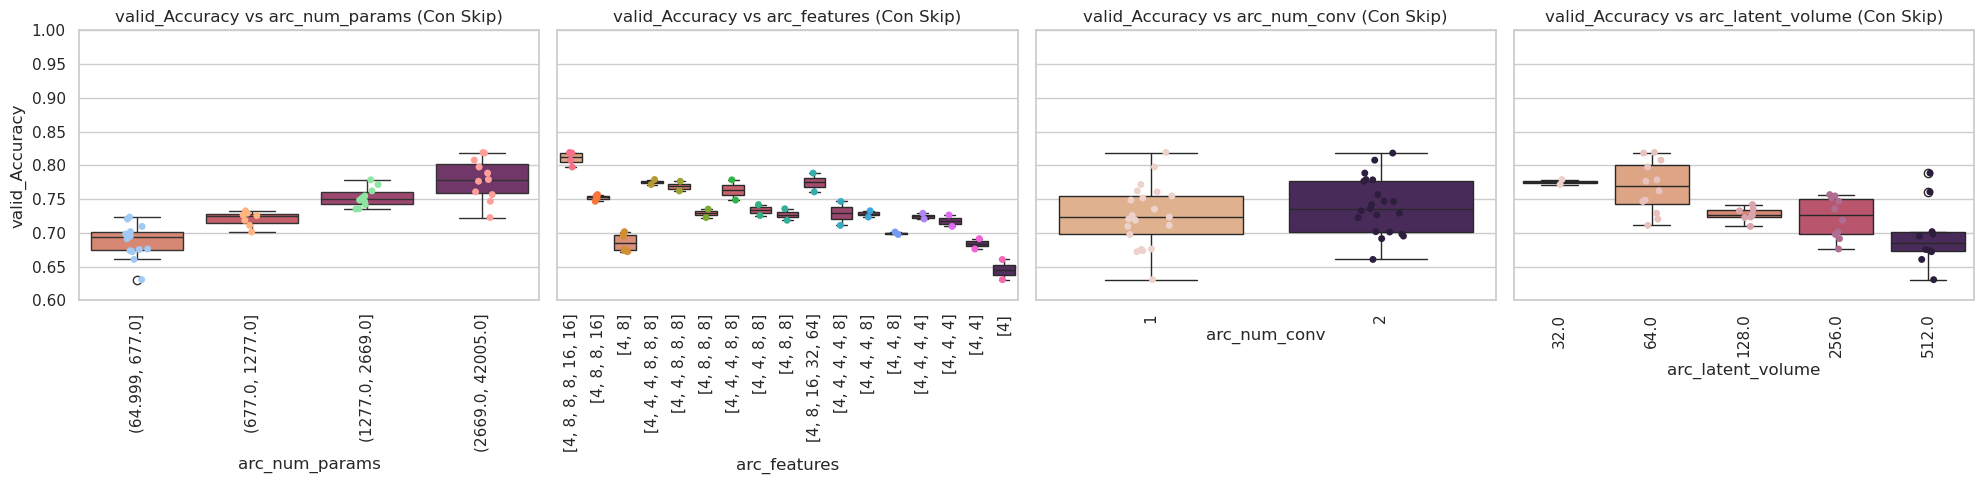

################    test_Accuracy    ################
################    test_Accuracy    ################


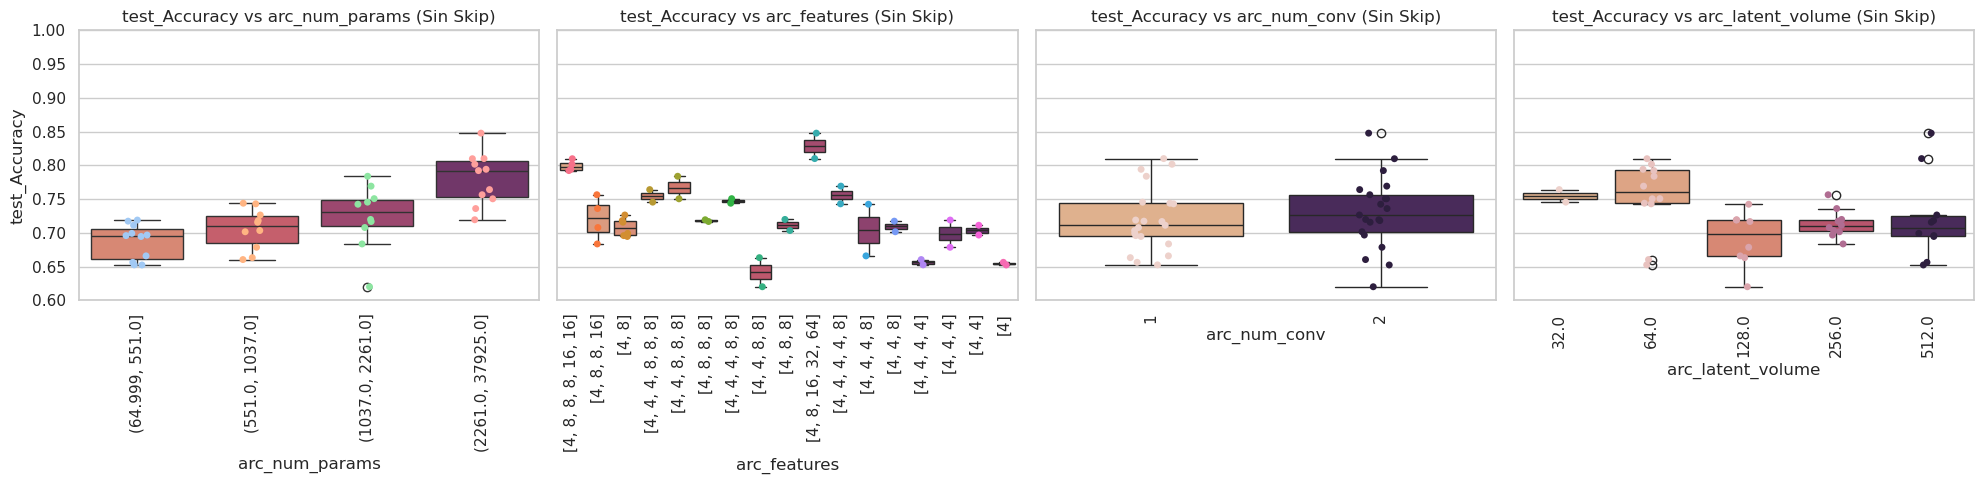

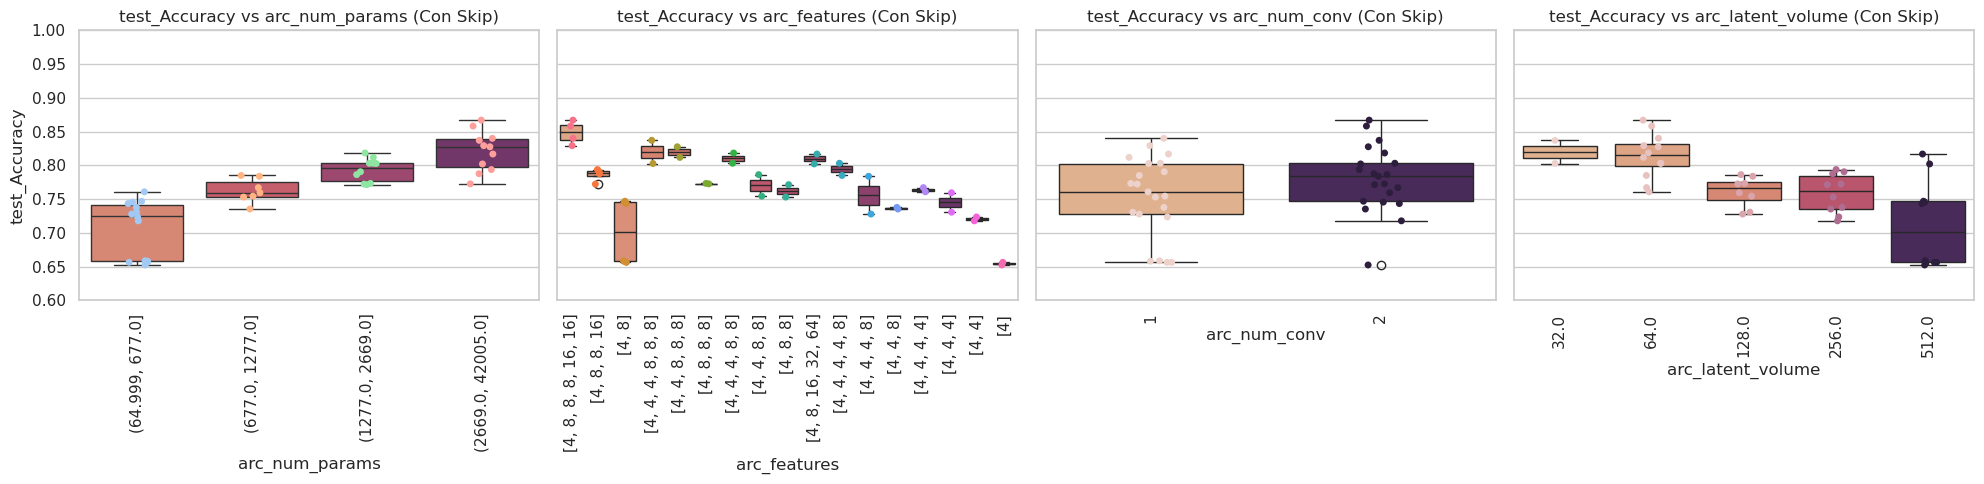

In [10]:
# Versión para modelos SIN skip connections

metrics = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]
for ac in metrics:
    print(f'################    {ac}    ################')
    print(f'################    {ac}    ################')
    plot_accuracy_by_fields(
        data_no_skip, fields, ac, ncols=4, title_suffix="(Sin Skip)"
    )
    # Versión para modelos con skip connections
    plot_accuracy_by_fields(
        data_skip, fields, ac, ncols=4, title_suffix="(Con Skip)"
    )